In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import keras_tuner as kt

Using TensorFlow backend


In [2]:
import opendatasets as od
import pandas

file=od.download('https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: borajyoti
Your Kaggle Key: ········


100%|██████████| 63.2M/63.2M [00:07<00:00, 8.46MB/s]


In [3]:
csv_file_path = 'age-gender-and-ethnicity-face-data-csv/age_gender.csv'

df = pd.read_csv(csv_file_path)

In [4]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


### Data Cleaning & Visualisation

In [284]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [285]:
df['pixels'] =df['pixels'].apply(lambda x : np.array(x.split(),dtype="float32"))

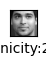

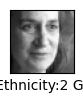

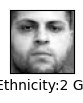

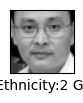

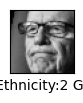

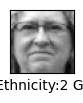

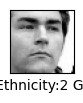

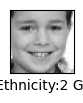

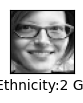

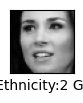

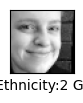

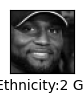

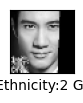

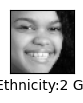

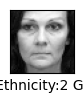

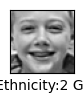

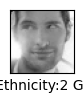

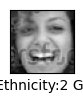

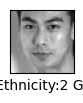

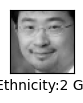

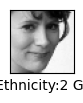

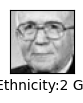

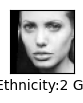

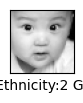

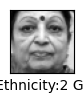

In [210]:
plt.figure(figsize=(2,2))

for i in range(25):
    index = np.random.randint(0, len(df))
    plt.subplot(5, 5, i + 1)
    plt.imshow(df['pixels'].iloc[index].reshape(48,48),"gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(
    "Age: "+str(df['age'].iloc[i])+
    " Ethnicity:"+str(df['ethnicity'].iloc[i])+
    " Gender:"+str(df['gender'].iloc[i]))
   
    plt.show()

In [286]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [258]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

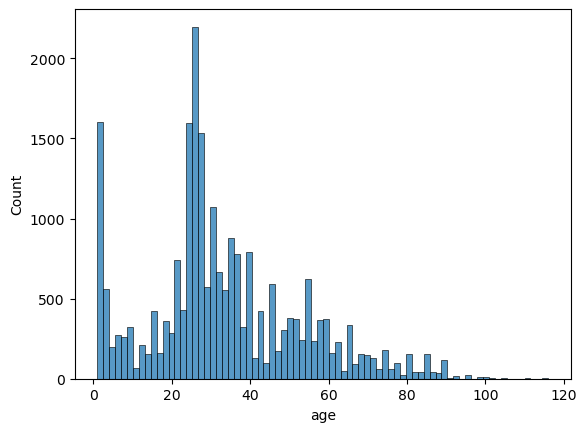

In [259]:
sns.histplot(data=df, x='age')

In [260]:
#ages = df['age']

#age_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-80', '80 and above']

#age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80,120]

#df = pd.DataFrame({'Age': ages})

#df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

#age_group_counts = df['Age Group'].value_counts().to_dict()

#age_group_counts

In [261]:
#df['Age Group']

In [262]:
#df['Age Group']=df['Age Group'].map({'0-5':0,'5-10':1,'10-15':2,'15-20':3,'20-25':4,'25-30':5,'30-35':6,'35-40':7,'40-45':8,'45-50':9,'50-55':10,'55-60':11,'60-80':12,'80 and above':13})

In [263]:
#df['Age Group'].value_counts()

In [287]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

<Axes: xlabel='ethnicity', ylabel='count'>

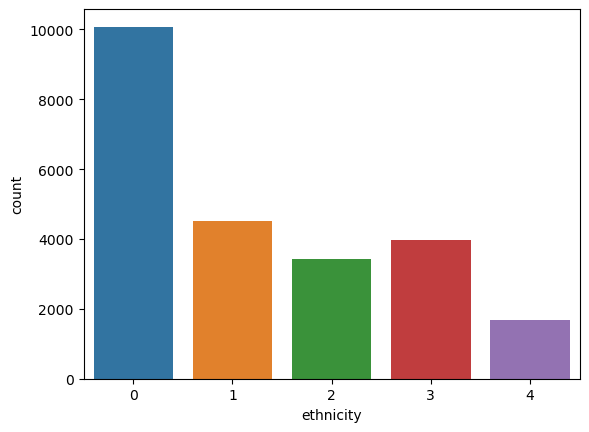

In [288]:
sns.countplot(data=df, x='ethnicity')

In [289]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [276]:
#ethnicity=np.array(ethnicity).astype(np.float32)

In [292]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

ethnicity_2d = df['ethnicity'].values.reshape(-1, 1)

ethnicity_encoded = encoder.fit_transform(ethnicity_2d)

ethnicity_encoded

C:\Users\Aaradhya Bora\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [293]:
ethnicity_encoded.shape

(23705, 5)

In [125]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

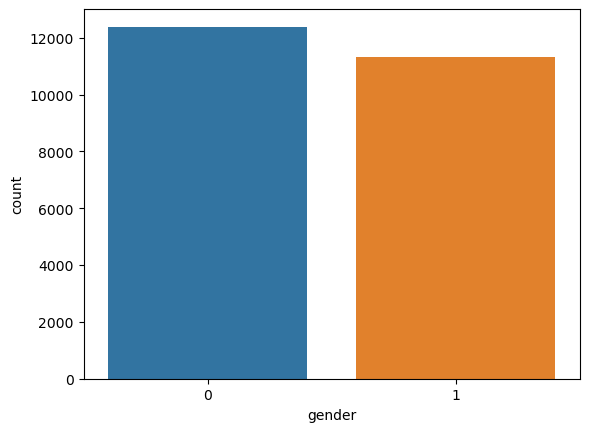

In [126]:
sns.countplot(data=df, x='gender')

### Divide data into X and y

In [294]:
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

In [295]:
X.shape

(23705, 48, 48, 1)

In [296]:
y = df.drop (['pixels','img_name'],axis=1)

In [297]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [298]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

In [299]:
datagen = ImageDataGenerator(
    rotation_range=5,        # Randomly rotate images by up to 40 degrees
    width_shift_range=0.1,    # Randomly shift the width of the images
    height_shift_range=0.1,   # Randomly shift the height of the images
    shear_range=0.2,          # Randomly apply shearing transformations
    zoom_range=0.1,           # Randomly zoom in on images
    horizontal_flip=False,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels with the nearest value
)


train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# 1. Prediction of Gender

### 1a. Train and Test Split

In [84]:
from sklearn.model_selection import train_test_split

gender = df['gender']
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X,gender,test_size=0.3,random_state=42)

train_generator_gender=train_datagen.flow(X_train_gender ,y_train_gender ,batch_size=32)
test_generator_gender=test_datagen.flow(X_test_gender ,y_test_gender ,batch_size=32)

In [85]:
X_train_gender.shape

(16593, 48, 48, 1)

### 1b. CNN Modelling

In [171]:
def build_model(hp):
    
    cnn = models.Sequential()

    counter = 0
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units'+ str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid','softmax']),
                    padding='same',
                    input_shape=(48, 48, 1)))  # Corrected input_shape
            cnn.add(layers.BatchNormalization())
            cnn.add(layers.MaxPooling2D((1, 1)))
            cnn.add(layers.Dropout(0.2))
        else:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units'+ str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid','LeakyReLU']),
                    padding='same',
                    input_shape=(48, 48, 1)))  # Corrected input_shape
            cnn.add(layers.BatchNormalization())
            cnn.add(layers.MaxPooling2D((1, 1)))
            cnn.add(layers.Dropout(0.2))
        counter += 1   
    
    # Flatten and add dense layers
    flatten_size = hp.Int('flatten_size', min_value=8, max_value=128, step=8)
    cnn.add(layers.Flatten())
    
    cnn.add(layers.Dense(64, activation='relu'))
    cnn.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    cnn.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta']), loss='binary_crossentropy', metrics=['accuracy'])

    return cnn


In [172]:
from keras_tuner import RandomSearch
from keras_tuner import HyperParameters

  
tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='output', project_name='Image_detection_3')
tuner_search.search(train_generator_gender, epochs=2, validation_data=test_generator_gender)

Reloading Tuner from output\Image_detection_3\tuner0.json


In [173]:
best_hps = tuner_search.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Activation Function: {best_hps.get('activation0')}")  # Assuming you want the activation function of the first layer
print(f"Number of Layers: {best_hps.get('num_layers')}")
print(f"Nodes per Layer: {best_hps.get('units0')}")



Best Hyperparameters:
Optimizer: adam
Activation Function: relu
Number of Layers: 4
Nodes per Layer: 72


In [176]:
print(Image_gender.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [177]:
model_gender = tuner_search.get_best_models(num_models=1)[0]

Image_gender=model_gender.fit(train_generator_gender,epochs=1, validation_data=test_generator_gender)



best_hyperparameters = best_hps.get_config()

training_loss = Image_gender.history['loss']
training_accuracy = Image_gender.history['accuracy']
validation_loss = Image_gender.history['val_loss']
validation_accuracy = Image_gender.history['val_accuracy']

# Create a dictionary to store the results
results = {
    'best_hyperparameters': best_hyperparameters,
    'training_loss': training_loss,
    'training_accuracy': training_accuracy,
    'validation_loss': validation_loss,
    'validation_accuracy': validation_accuracy
}

# Specify the filename where you want to save the results
json_filename_gender = 'hyperparameter_results.json'

# Save the results to the JSON file
with open(json_filename_gender, 'w') as json_file:
    json.dump(results, json_file, indent=4)

print(f'Results saved to {json_filename_gender}')

519/519 [==============================] - 1125s 2s/step - loss: 0.3620 - accuracy: 0.8633 - val_loss: 0.7114 - val_accuracy: 0.7895
Results saved to hyperparameter_results.json


1. Model Accuracy is 86%
2. Val_accuracy is 79%

### 1c. Prediction

In [90]:
model.evaluate(X_test_gender,y_test_gender)

223/223 [==============================] - 78s 349ms/step - loss: 0.3607 - accuracy: 0.8272


[0.3607197701931, 0.8271934986114502]

After evaluating the model accuracy is 83%

In [178]:
gen_pred = model.predict(X_test_gender)
gender_prediction=(gen_pred>0.5)

223/223 [==============================] - 83s 371ms/step


In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test_gender,gender_prediction)
print(cm)
accuracy_score(y_test_gender,gender_prediction)

[[3599  142]
 [1087 2284]]


0.827193475815523

In [32]:
import json

project_data_Image_gender_Prediction = {
    
    "model_info": {
        "model_name": "CNN Model",
        "model_description": "Convolutional neural network with multiple layers",
        "model_training": "Optimizer: Adam, Learning rate: 0.001, Activation Function: relu, Number of Layers: 4,Nodes per Layer: 72, Batch size: 32, Epochs: 2",
        "model_evaluation": "Accuracy: 86%, Loss: 0.36, Val_accuracy: 79%, val_loss: 0.71"
    },
    "hyperparameters": {
        "learning_rate": 0.001,
        "batch_size": 32,
        "num_epochs": 2,
        
    },
    "results": {
        "result_1": "Achieved 83% accuracy on the evaluation of test set.",
        "result_2": "Accuracy Score is 83%.",
        "Confusion Matrix": "[3599  142],[1087 2284]"
                        
   
    }
}

# Save the project data to a JSON file
with open('project_data_Image_gender_Prediction.json', 'w') as json_file:
    json.dump(project_data_Image_gender_Prediction, json_file, indent=4)


# 2. Prediction of Age 

### 2a. Train and Test split

In [94]:
from sklearn.model_selection import train_test_split

age = df['age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X,age,test_size=0.3,random_state=42)

train_generator_age=train_datagen.flow(X_train_age ,y_train_age ,batch_size=32)
test_generator_age=test_datagen.flow(X_test_age ,y_test_age ,batch_size=32) 

In [95]:
X_train_age.shape

(16593, 48, 48, 1)

### CNN Modelling

In [96]:
def build_model(hp):
    
    cnn = models.Sequential()

    counter = 0
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units'+ str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid','softmax']),
                    padding='same',
                    input_shape=(48, 48, 1)))  # Corrected input_shape
            cnn.add(layers.BatchNormalization())
            cnn.add(layers.MaxPooling2D((1, 1)))
            cnn.add(layers.Dropout(0.2))
        else:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units'+ str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid','softmax']),
                    padding='same',
                    input_shape=(48, 48, 1)))  # Corrected input_shape
            cnn.add(layers.BatchNormalization())
            cnn.add(layers.MaxPooling2D((1, 1)))
            cnn.add(layers.Dropout(0.2))
        counter += 1   
    
    # Flatten and add dense layers
    flatten_size = hp.Int('flatten_size', min_value=8, max_value=128, step=8)
    cnn.add(layers.Flatten())
    
    cnn.add(layers.Dense(64, activation='relu'))
    cnn.add(layers.Dense(1, activation='linear'))

    # Compile the model
    cnn.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta']), loss='mean_absolute_error', metrics=['mae'])

    return cnn


In [97]:
tuner_search = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='output', project_name='Image_detection_age')
tuner_search.search(train_generator_age, epochs=2, validation_data=test_generator_age)

Reloading Tuner from output\Image_detection_age\tuner0.json


In [98]:
best_hps = tuner_search.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Activation Function: {best_hps.get('activation0')}")  # Assuming you want the activation function of the first layer
print(f"Number of Layers: {best_hps.get('num_layers')}")
print(f"Nodes per Layer: {best_hps.get('units0')}")


Best Hyperparameters:
Optimizer: adam
Activation Function: relu
Number of Layers: 7
Nodes per Layer: 112


In [29]:
model_age = tuner_search.get_best_models(num_models=1)[0]

Image_age = model_age.fit(train_generator_age, epochs=2, validation_data=test_generator_age)




import json

best_hyperparameters_age = best_hps.get_config()

training_loss = Image_age.history['loss']
training_mae = Image_age.history['mae']
validation_loss = Image_age.history['val_loss']
validation_mae = Image_age.history['val_mae']

# Create a dictionary to store the results
results = {
    'best_hyperparameters': best_hyperparameters_age,
    'training_loss': training_loss,
    'training_mae': training_mae,
    'validation_loss': validation_loss,
    'validation_mae': validation_mae
}

# Specify the filename where you want to save the results
json_filename_age = 'hyperparameter_results.json'

# Save the results to the JSON file
with open(json_filename_age, 'w') as json_file:
    json.dump(results, json_file, indent=4)

print(f'Results saved to {json_filename_age}')

Epoch 1/2
519/519 [==============================] - 1577s 3s/step - loss: 99.9214 - mae: 7.4377 - val_loss: 159.5886 - val_mae: 8.9855
Epoch 2/2
519/519 [==============================] - 1642s 3s/step - loss: 83.8375 - mae: 6.8487 - val_loss: 255.2205 - val_mae: 10.2393
Results saved to hyperparameter_results.json


### 2c. Prediction

In [31]:
model_age.evaluate(X_test_age,y_test_age)

223/223 [==============================] - 111s 498ms/step - loss: 408.8711 - mae: 16.4835


[408.87109375, 16.483495712280273]

In [36]:
y_test_age

17814    49
15080    39
22829     8
16074    40
8972     27
         ..
11153    30
953       1
6045     25
13369    35
12841    34
Name: age, Length: 7112, dtype: int64

In [34]:
age_predict = model_age.predict(X_test_age)

223/223 [==============================] - 104s 466ms/step


In [35]:
age_predict

array([[45.558674],
       [61.62584 ],
       [34.14882 ],
       ...,
       [53.613686],
       [52.193962],
       [40.86253 ]], dtype=float32)

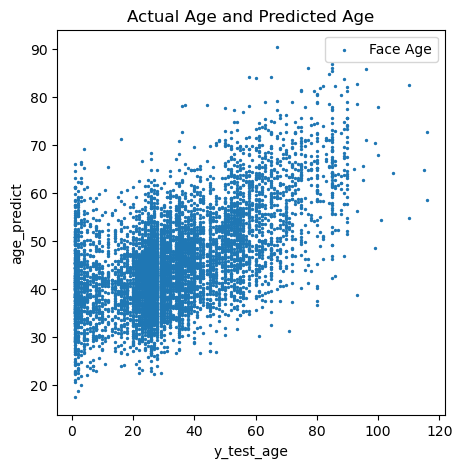

In [99]:
plt.figure(figsize=(5,5))  

plt.scatter(y_test_age, age_predict, label="Face Age", s=2)  
plt.title('Actual Age and Predicted Age')

plt.xlabel('y_test_age')   
plt.ylabel('age_predict')

plt.legend()
plt.show()

In [103]:
import json

project_data_Image_Age_Prediction = {
    
    "model_info": {
        "model_name": "CNN Model",
        "model_description": "Convolutional neural network with multiple layers",
        "model_training": "Optimizer: Adam, Learning rate: 0.001, Activation Function: relu, Number of Layers: 7,Nodes per Layer: 112, Batch size: 32, Epochs: 2",
        "model_validation_data": "mae: 6.85, Loss: 83.84, Val_mae: 10, val_loss: 255",
        "model_evaluation": "mae: 16.48, Loss: 409"
    },
    "hyperparameters": {
        "learning_rate": 0.001,
        "batch_size": 32,
        "num_epochs": 2,
        
   
    }
}

# Save the project data to a JSON file
with open('project_data_Image_Age_Prediction.json', 'w') as json_file:
    json.dump(project_data_Image_Age_Prediction, json_file, indent=4)


# 3. Ethnicity

### 3a. Train and Test split

In [300]:
# separate dataset into train and test for age, gender,ethinicity
from sklearn.model_selection import train_test_split

X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, ethnicity_encoded, test_size=0.3, random_state=42)

train_generator_ethnicity=train_datagen.flow(X_train_ethnicity ,y_train_ethnicity ,batch_size=32)
test_generator_ethnicity=test_datagen.flow(X_test_ethnicity ,y_test_ethnicity ,batch_size=32)

In [301]:
X_train_ethnicity.shape,y_test_ethnicity.shape

((16593, 48, 48, 1), (7112, 5))

In [302]:
y_test_ethnicity

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [303]:
y_test_ethnicity.dtype

dtype('float64')

### 3b. CNN Modeling

In [312]:
def build_model_ethnicity(hp):
    cnn = models.Sequential()

    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if i == 0:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid', 'softmax']),
                    padding='same',
                    input_shape=(48, 48, 1)))  # Set input_shape for the first layer
        else:
            cnn.add(
                layers.Conv2D(
                    hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    kernel_size=(3, 3),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid', 'softmax']),
                    padding='same'))
        cnn.add(layers.BatchNormalization())
        cnn.add(layers.MaxPooling2D((1, 1)))
        cnn.add(layers.Dropout(0.2))

    # Flatten and add dense layers
    flatten_size = hp.Int('flatten_size', min_value=8, max_value=128, step=8)
    cnn.add(layers.Flatten())

    cnn.add(layers.Dense(64, activation='relu'))
    cnn.add(layers.Dense(5, activation='softmax'))

    # Compile the model
    cnn.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta']),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return cnn


In [314]:
tuner_search_ethnicity = kt.RandomSearch(build_model_ethnicity, objective='val_accuracy', max_trials=5, directory='output', project_name='Image_detection_ethnicity_5')
tuner_search_ethnicity.search(train_generator_ethnicity, epochs=2, validation_data=test_generator_ethnicity, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

Trial 5 Complete [00h 37m 12s]
val_accuracy: 0.7362204790115356

Best val_accuracy So Far: 0.753796398639679
Total elapsed time: 02h 26m 21s


In [315]:
best_hps_ethnicity = tuner_search_ethnicity.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Activation Function: {best_hps.get('activation0')}") 
print(f"Number of Layers: {best_hps.get('num_layers')}")
print(f"Nodes per Layer: {best_hps.get('units0')}")

Best Hyperparameters:
Optimizer: adam
Activation Function: relu
Number of Layers: 7
Nodes per Layer: 112


In [316]:
model_ethnicity = tuner_search_ethnicity.get_best_models(num_models=1)[0]

Image_ethnicity = model_ethnicity.fit(train_generator_ethnicity, epochs=2, validation_data=test_generator_ethnicity)



best_hyperparameters_ethnicity = best_hps_ethnicity.get_config()

training_loss = Image_ethnicity.history['loss']
training_accuracy = Image_ethnicity.history['accuracy']
validation_loss = Image_ethnicity.history['val_loss']
validation_accuracy = Image_ethnicity.history['val_accuracy']

# Create a dictionary to store the results
results = {
    'best_hyperparameters': best_hyperparameters_ethnicity,
    'training_loss': training_loss,
    'training_accuracy': training_accuracy,
    'validation_loss': validation_loss,
    'validation_accuracy': validation_accuracy
}

# Specify the filename where you want to save the results
json_filename_ethnicity = 'hyperparameter_results_ethnicity.json'

# Save the results to the JSON file
with open(json_filename_ethnicity, 'w') as json_file:
    json.dump(results, json_file, indent=4)

print(f'Results saved to {json_filename_ethnicity}')

Epoch 1/2
519/519 [==============================] - 628s 1s/step - loss: 0.6775 - accuracy: 0.7616 - val_loss: 0.7437 - val_accuracy: 0.7499
Epoch 2/2
519/519 [==============================] - 632s 1s/step - loss: 0.6102 - accuracy: 0.7852 - val_loss: 0.6982 - val_accuracy: 0.7622
Results saved to hyperparameter_results_ethnicity.json


In [317]:
print(model_ethnicity.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 88)        880       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 88)        352       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 88)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 88)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 24)        19032     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 24)        9

### 3c. Prediction

In [318]:
X_test_ethnicity.shape,y_test_ethnicity.shape

((7112, 48, 48, 1), (7112, 5))

In [319]:
model_ethnicity.evaluate(X_test_ethnicity,y_test_ethnicity)

223/223 [==============================] - 40s 182ms/step - loss: 1.2471 - accuracy: 0.5951


[1.2470964193344116, 0.5950506329536438]

In [320]:
ethnicity_prediction = model_ethnicity.predict(X_test_ethnicity)

223/223 [==============================] - 40s 178ms/step


In [324]:
E=ethnicity_prediction.flatten()
E

array([0.6140759 , 0.00942859, 0.07054499, ..., 0.0153808 , 0.02777229,
       0.06210376], dtype=float32)

In [325]:
E.shape

(35560,)

In [326]:
ethnicity_prediction.shape

(7112, 5)

In [327]:
E_=(E>0.5)
E_

array([ True, False, False, ..., False, False, False])

In [328]:
ethnicity_prediction=np.zeros((len(E)))
for i in range(len(E_)):
    if E_[i] ==False:
               ethnicity_prediction[i]=0
    else:
               ethnicity_prediction[i]=1

In [329]:
ethnic_predicted=ethnicity_prediction.reshape(7112, 5)
ethnic_predicted

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [330]:
y_test_ethnicity

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [331]:
y_ethnicity=np.zeros((len(y_test_ethnicity)))
for i in range(len(y_test_ethnicity)):
    y_ethnicity[i]=np.argmax(y_test_ethnicity[i])

y_ethnicity

array([1., 1., 4., ..., 2., 1., 0.])

In [332]:
y_ethnicity=y_ethnicity.reshape(len(y_test_ethnicity),1)
y_ethnicity

array([[1.],
       [1.],
       [4.],
       ...,
       [2.],
       [1.],
       [0.]])

In [333]:
#reversing hot endcoding for y_predict
ethnicity_y_predicted=np.zeros((len(ethnic_predicted)))
for i in range(len(ethnic_predicted)):
    ethnicity_y_predicted[i]=np.argmax(ethnic_predicted[i])

ethnicity_y_predicted

array([0., 1., 0., ..., 2., 2., 0.])

In [334]:
ethnicity_y_predicted=ethnicity_y_predicted.reshape(len(ethnic_predicted),1)
ethnicity_y_predicted

array([[0.],
       [1.],
       [0.],
       ...,
       [2.],
       [2.],
       [0.]])

In [335]:
print(np.concatenate((ethnicity_y_predicted.reshape(len(ethnicity_y_predicted),1),y_ethnicity.reshape(len(y_ethnicity),1)),1))

[[0. 1.]
 [1. 1.]
 [0. 4.]
 ...
 [2. 2.]
 [2. 1.]
 [0. 0.]]


In [336]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_ethnicity,ethnicity_y_predicted)
print(cm)
accuracy_score(y_ethnicity,ethnicity_y_predicted)

[[2512    7  400  152    0]
 [ 762  298  113  172    1]
 [ 178    0  830   13    0]
 [ 550    1  115  504    0]
 [ 358    1   92   53    0]]


0.5826771653543307

In [337]:
import json

project_data_Image_ethnicity_Prediction = {
    
    "model_info": {
        "model_name": "CNN Model",
        "model_description": "Convolutional neural network with multiple layers",
        "model_training": "Optimizer: Adam, Learning rate: 0.001, Activation Function: relu, Number of Layers: 7,Nodes per Layer: 112, Batch size: 32, Epochs: 2",
        "model_evaluation": "Accuracy: 76%, Loss: 0.68, Val_accuracy: 75%, val_loss: 0.74" 
    },
    "hyperparameters": {
        "learning_rate": 0.001,
        "batch_size": 32,
        "num_epochs": 2,
        
    },
    "results": {
        "result_1": "Achieved 59% accuracy on the evaluation of test set.",
        "result_2": "Accuracy Score is 58%.",
        "Confusion Matrix": "[[2512    7  400  152    0], [ 762  298  113  172    1], [ 178    0  830   13    0], [ 550    1  115  504    0], [ 358    1   92   53    0]]"
                        
   
    }
}

# Save the project data to a JSON file
with open('project_data_Image_ethnicity_Prediction.json', 'w') as json_file:
    json.dump(project_data_Image_ethnicity_Prediction, json_file, indent=4)
